# Pentautan ke Google Drive

In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Library

In [26]:
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix ,accuracy_score,recall_score,precision_score,f1_score
from keras import optimizers
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        validation_split=0.1) # menentukan jumlah persentase data validasi sebesar 40% dari total dataset

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Bisa AI/Dataset/',target_size=(128,128),color_mode='rgb',batch_size=30,shuffle=True,
        subset='training') # gunakan subset untuk menandai set data bertugas sebagai set data train

validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Bisa AI/Dataset/',batch_size=64,shuffle=False,target_size=(128,128), # sama dengan train generator
        subset='validation') # gunakan subset untuk menandai set data bertugas sebagai set data validation


Found 8085 images belonging to 3 classes.
Found 897 images belonging to 3 classes.


# Pembuatan Model CNN

In [5]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()

#Konvolusi 1 + Input Layer 
model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same',
                 input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
#Konvolusi 2
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
#Konvolusi 3
model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
#Konvolusi 4
model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Dropout(0.2))

#Flatten
model.add(Flatten())

#Hidden Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
#Hidden Layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(3, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [8]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
      self.model.stop_training = True

stopTraining = Callback()

# Pelatihan Model

In [9]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    callbacks=[stopTraining])

Epoch 1/10
270/270 [==============================] - 1579s 6s/step - loss: 0.3585 - accuracy: 0.8580 - val_loss: 0.2285 - val_accuracy: 0.9186
Epoch 2/10
270/270 [==============================] - 290s 1s/step - loss: 0.1599 - accuracy: 0.9435 - val_loss: 0.1741 - val_accuracy: 0.9298
Epoch 3/10
270/270 [==============================] - 289s 1s/step - loss: 0.1099 - accuracy: 0.9624 - val_loss: 0.1288 - val_accuracy: 0.9632
Epoch 4/10
270/270 [==============================] - 293s 1s/step - loss: 0.0841 - accuracy: 0.9706 - val_loss: 0.1459 - val_accuracy: 0.9532
Epoch 5/10
270/270 [==============================] - 295s 1s/step - loss: 0.0758 - accuracy: 0.9732 - val_loss: 0.0984 - val_accuracy: 0.9721


# Prediksi Model

In [10]:
predicts_vectors = model.predict_generator(validation_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


15/15 [==============================] - 9s 570ms/step


# Validasi Model

In [11]:
pred = np.argmax(predicts_vectors,axis=1)

In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer () 

lb.fit(validation_generator.labels)

y_test = lb.transform (validation_generator.labels)
y_pred = lb.transform (pred)

In [13]:
y_true = validation_generator.labels
y_pred = pred

recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
acc = accuracy_score(validation_generator.labels, pred)

In [30]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [15]:
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 

In [18]:
print('>> Result <<')
print('Acc: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Acore: {}'.format(f1))

>> Result <<
Acc: 97.21293199554069
Recall: 97.21293199554069
Precision: 97.22600517156124
F1-Acore: 0.9721065997511934


In [19]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       299
           1       0.97      0.96      0.96       299
           2       0.99      0.97      0.98       299

    accuracy                           0.97       897
   macro avg       0.97      0.97      0.97       897
weighted avg       0.97      0.97      0.97       897



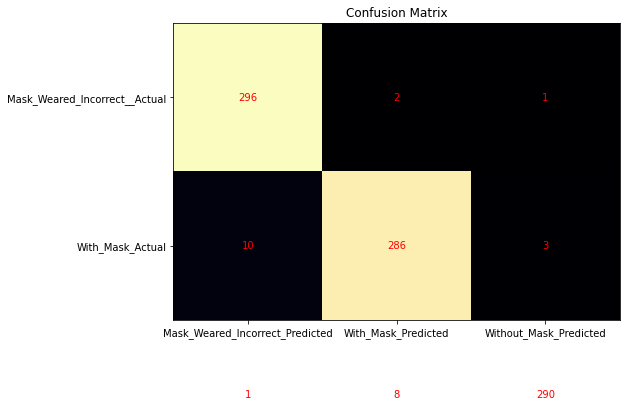

acc: 0.9721
sensitivity: 0.9900
specificity: 0.9565


In [22]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1,2])

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Mask_Weared_Incorrect_Predicted', 'With_Mask_Predicted', 'Without_Mask_Predicted'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Mask_Weared_Incorrect__Actual', 'With_Mask_Actual', 'Without_Mask_Actual'))
ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

In [23]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1,2])

In [24]:
cm_df = pd.DataFrame(cm,
                     index = ['Mask_Weared_Incorrect', 'With_Mask', 'Without_Mask'], 
                     columns = ['Mask_Weared_Incorrect', 'With_Mask', 'Without_Mask'])

acc: 0.9721
sensitivity: 0.9900
specificity: 0.9565


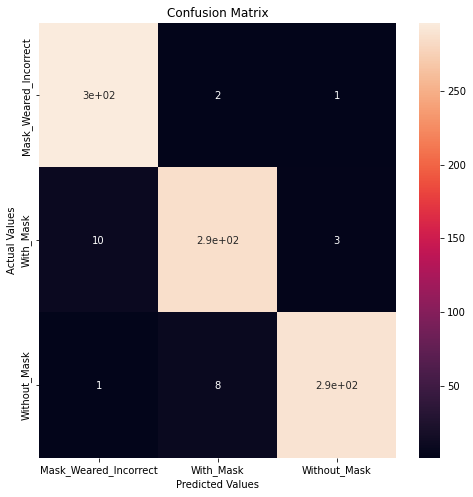

In [27]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

plt.show()

Saving 8.png to 8.png


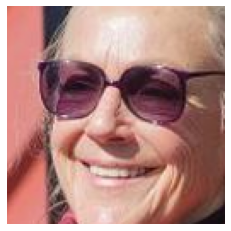

True
8.png incorrect mask


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  multiclasses = model.predict(images, batch_size=10)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  print((multiclasses).any())
  if (multiclasses).any()>0.75:
    print(fn + " incorrect mask")
  elif (multiclasses).any()>0.5:
    print(fn + " with mask")
  else:
    print(fn + " without mask")